# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
cust=pd.read_csv('../Wholesale customers data.csv')
cust.shape,cust.head()

((440, 8),
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
 0        2       3  12669  9656     7561     214              2674        1338
 1        2       3   7057  9810     9568    1762              3293        1776
 2        2       3   6353  8808     7684    2405              3516        7844
 3        1       3  13265  1196     4221    6404               507        1788
 4        2       3  22615  5410     7198    3915              1777        5185)

In [3]:
cust.columns=cust.columns.str.lower() 
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
channel             440 non-null int64
region              440 non-null int64
fresh               440 non-null int64
milk                440 non-null int64
grocery             440 non-null int64
frozen              440 non-null int64
detergents_paper    440 non-null int64
delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

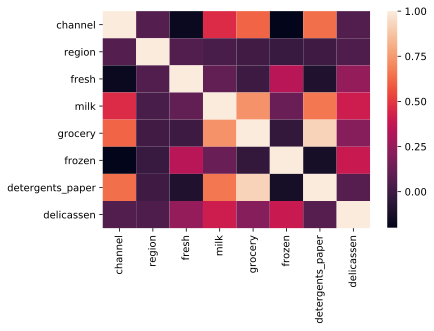

In [4]:
# Your code here:
#"80% of sales come from 20% of clients"
corr=cust.corr(method ='pearson')
sns.heatmap(corr);

In [5]:
cust.columns,cust.describe()

(Index(['channel', 'region', 'fresh', 'milk', 'grocery', 'frozen',
        'detergents_paper', 'delicassen'],
       dtype='object'),
           channel      region          fresh          milk       grocery  \
 count  440.000000  440.000000     440.000000    440.000000    440.000000   
 mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
 std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
 min      1.000000    1.000000       3.000000     55.000000      3.000000   
 25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
 50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
 75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
 max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   
 
              frozen  detergents_paper    delicassen  
 count    440.000000        440.000000    440.000000  
 mean    3071.931818       2881.493182   1524.870455  
 std  

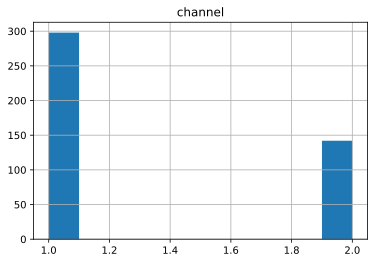

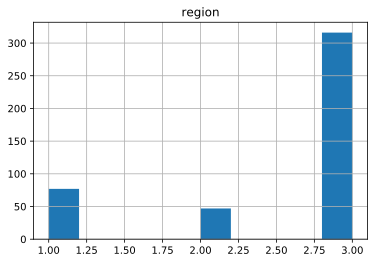

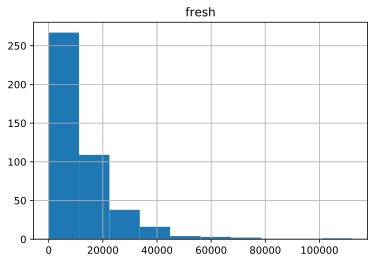

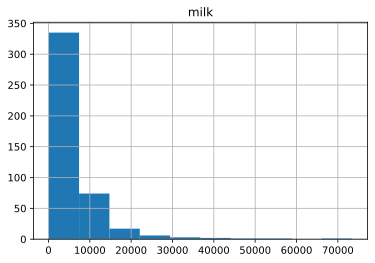

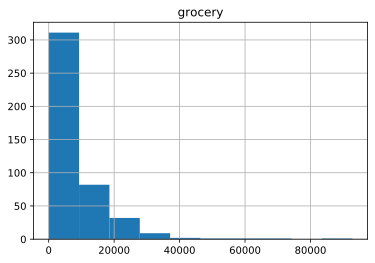

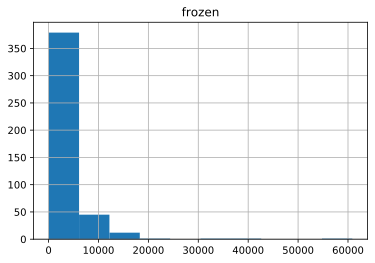

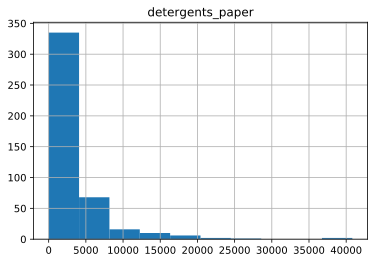

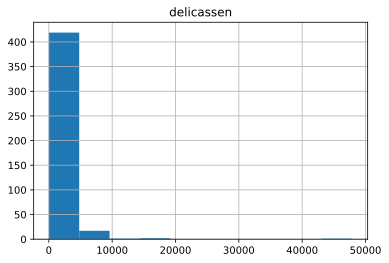

In [6]:
#https://stackoverflow.com/questions/19189488/use-a-loop-to-plot-n-charts-python
for e in range(0,len(cust.columns)):
    plt.figure()
    plt.title(cust.columns[e])
    cust[cust.columns[e]].hist();

In [7]:
# Your observations here
#No hay columnas categoricas, todas son del tipo int, supongo que las column as 'channel' y 'region' ya 
#estan codificadas
#
#No hay datos nulos
#
#Si las columnas 'channel' y 'region' estan codificadas, tal vez referidas al canal de distribución que maneja una 
#tienda y a la region que tiene establecida dicha tienda, respectivamente. A mi parecer son del tipo one hot encoding, por lo
#que pueden ser utiles, más adelante
#
#Las demas columnas presentan outliers
#
#Hay una alta colinealidad entre la columna 'grocery' y 'detergent paper'
#
#Todas las columnas numericas, excepto 'channel' y 'region', tienen una asimetria positiva

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

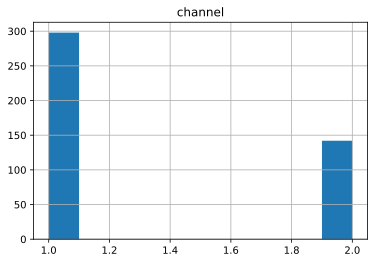

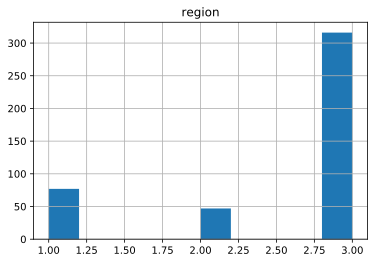

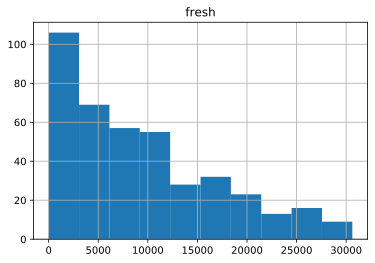

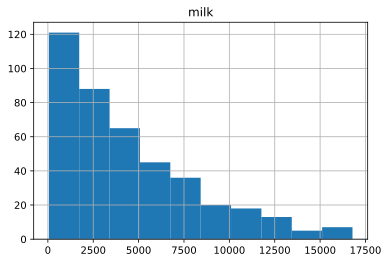

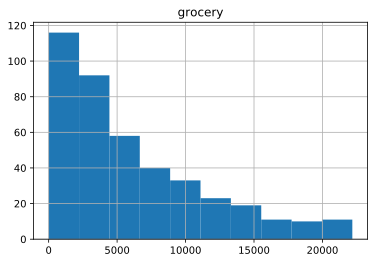

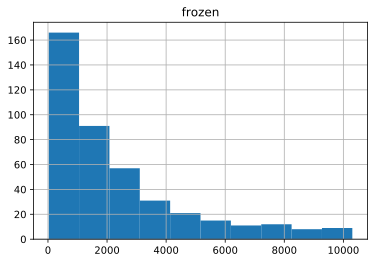

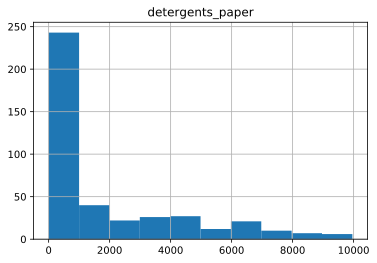

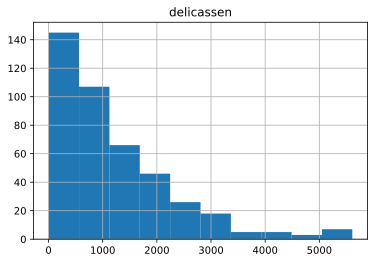

In [8]:
# Your code here
#Para quitar los outliers
#https://stackoverflow.com/questions/51879812/how-to-detect-and-remove-outliers-from-each-column-of-pandas-dataframe-at-one-go
for e in range(2,len(cust.columns)):
    cust[cust.columns[e]]=cust[cust.columns[e]].mask((cust[cust.columns[e]]-cust[cust.columns[e]].mean()).abs()>1.5*cust[cust.columns[e]].std()).dropna()
for e in range(0,len(cust.columns)):
    plt.figure()
    plt.title(cust.columns[e])
    cust[cust.columns[e]].hist();

In [9]:
cust.describe()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
count,440.000000,440.000000,408.000000,418.000000,413.000000,421.000000,414.000000,428.000000
mean,1.322727,2.543182,9404.862745,4499.289474,6185.169492,2333.403800,1954.311594,1223.544393
std,0.468052,0.774272,7713.521458,3770.712079,5320.571001,2358.049023,2436.208190,1099.236693
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,2989.750000,1464.500000,2070.000000,669.000000,244.500000,404.750000
50%,1.000000,3.000000,7583.500000,3423.000000,4329.000000,1420.000000,733.500000,921.500000
75%,2.000000,3.000000,14144.000000,6456.250000,9170.000000,3151.000000,3314.000000,1726.750000
max,2.000000,3.000000,30624.000000,16784.000000,22182.000000,10303.000000,9959.000000,5609.000000


In [10]:
# Your comment here
cust=cust.dropna()
cust_bonus=cust
cust.isna().sum()

channel             0
region              0
fresh               0
milk                0
grocery             0
frozen              0
detergents_paper    0
delicassen          0
dtype: int64

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [11]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(cust)
cust_scale=pd.DataFrame(scaler.transform(cust),columns=cust.columns)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [12]:
# Your code here:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit(cust_scale)

Count the values in `labels`.

In [13]:
# Your code here:
cust['labels']=clusters.labels_
cust.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,1
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2


In [14]:
cust.labels.value_counts()

3    127
2     93
0     68
1     62
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
# Your code here
dbscan=DBSCAN(eps=0.5)
clustersDB=dbscan.fit(cust_scale)
cust['labels_DBSCAN']=clustersDB.labels_
cust.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels,labels_DBSCAN
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2,-1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2,-1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1,-1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,1,-1
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2,-1


Count the values in `labels_DBSCAN`.

In [16]:
# Your code here
cust.labels_DBSCAN.value_counts()

-1    320
 0     30
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

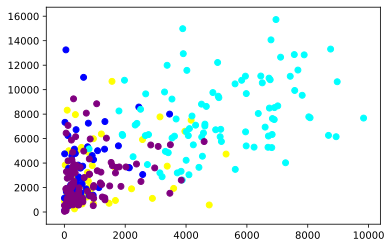

In [17]:
# Your code here:
X1=cust[cust.labels==0].detergents_paper
X2=cust[cust.labels==1].detergents_paper
X3=cust[cust.labels==2].detergents_paper
X4=cust[cust.labels==3].detergents_paper
y1=cust[cust.labels==0].milk
y2=cust[cust.labels==1].milk
y3=cust[cust.labels==2].milk
y4=cust[cust.labels==3].milk
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue')
plt.scatter(X3,y3, color='cyan')
plt.scatter(X4,y4, color='purple');

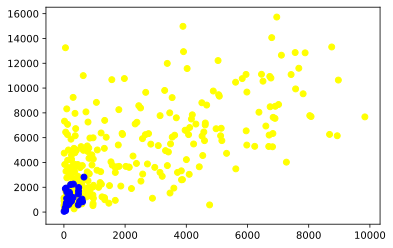

In [18]:
X1=cust[cust.labels_DBSCAN==-1].detergents_paper
X2=cust[cust.labels_DBSCAN==0].detergents_paper

y1=cust[cust.labels_DBSCAN==-1].milk
y2=cust[cust.labels_DBSCAN==0].milk

plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue');

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

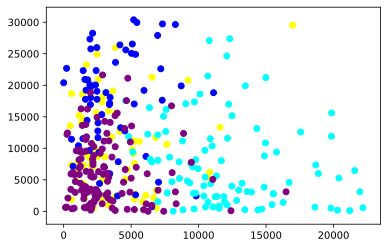

In [19]:
# Your code here:
X1=cust[cust.labels==0].grocery
X2=cust[cust.labels==1].grocery
X3=cust[cust.labels==2].grocery
X4=cust[cust.labels==3].grocery
y1=cust[cust.labels==0].fresh
y2=cust[cust.labels==1].fresh
y3=cust[cust.labels==2].fresh
y4=cust[cust.labels==3].fresh
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue')
plt.scatter(X3,y3, color='cyan')
plt.scatter(X4,y4, color='purple');

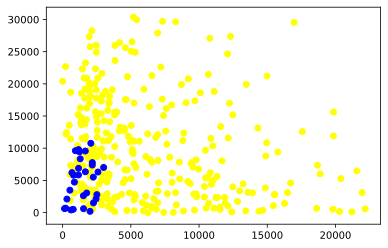

In [20]:
X1=cust[cust.labels_DBSCAN==-1].grocery
X2=cust[cust.labels_DBSCAN==0].grocery

y1=cust[cust.labels_DBSCAN==-1].fresh
y2=cust[cust.labels_DBSCAN==0].fresh

plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue');

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

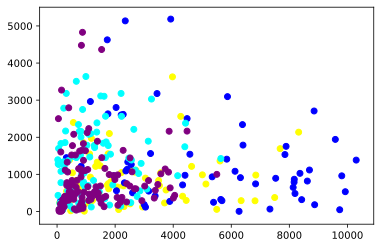

In [21]:
# Your code here:
X1=cust[cust.labels==0].frozen
X2=cust[cust.labels==1].frozen
X3=cust[cust.labels==2].frozen
X4=cust[cust.labels==3].frozen
y1=cust[cust.labels==0].delicassen
y2=cust[cust.labels==1].delicassen
y3=cust[cust.labels==2].delicassen
y4=cust[cust.labels==3].delicassen
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue')
plt.scatter(X3,y3, color='cyan')
plt.scatter(X4,y4, color='purple');

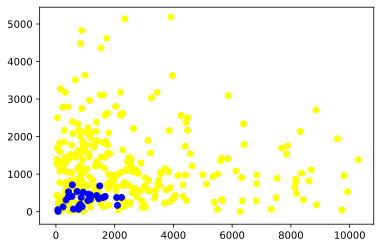

In [22]:
X1=cust[cust.labels_DBSCAN==-1].frozen
X2=cust[cust.labels_DBSCAN==0].frozen

y1=cust[cust.labels_DBSCAN==-1].delicassen
y2=cust[cust.labels_DBSCAN==0].delicassen

plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue');

In [23]:
cust.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels,labels_DBSCAN
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2,-1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2,-1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1,-1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,1,-1
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2,-1


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [24]:
# Your code here:
new_cust=cust.drop('labels',axis=1)
cust_labels=new_cust.groupby('labels_DBSCAN').mean()
cust_labels

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
labels_DBSCAN,,,,,,,,
-1,1.30625,2.5125,9808.806250,4383.743750,6170.284375,2311.831250,2068.256250,1140.659375
0,1.00000,3.0000,4931.666667,1172.566667,1452.266667,975.733333,251.933333,336.066667


In [25]:
new_cust=cust.drop('labels_DBSCAN',axis=1)
cust_labels=new_cust.groupby('labels').mean()
cust_labels

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
labels,,,,,,,,
0,1.073529,1.220588,10136.647059,2716.852941,3826.235294,2503.602941,940.735294,869.000000
1,1.032258,2.903226,17501.596774,3488.612903,3755.387097,5081.919355,643.064516,1334.290323
2,1.956989,2.741935,7508.419355,7856.161290,12091.526882,1271.333333,5155.150538,1338.408602
3,1.015748,2.960630,6410.188976,2411.905512,3153.771654,1303.149606,678.196850,856.716535


Which algorithm appears to perform better?

In [26]:
# Your observations here
#Aparentemente funciona más simple el DBSCAN, además de que no hay que especificar la cantidad de clusters, este
#algoritmo lo hace automaticamente

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [32]:
# Your code here
#KMeans with two clusters
scaler=StandardScaler()
scaler.fit(cust_bonus)
cust_scale_bonus=pd.DataFrame(scaler.transform(cust_bonus),columns=cust_bonus.columns)
kme=KMeans(n_clusters=2)
clust=kme.fit(cust_scale_bonus)
cust_bonus['labels']=clust.labels_
cust_bonus=cust_bonus.drop('labels_DBSCAN',axis=1)
cust_bonus.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,0


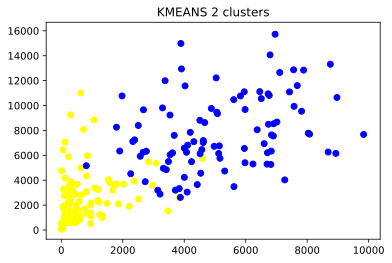

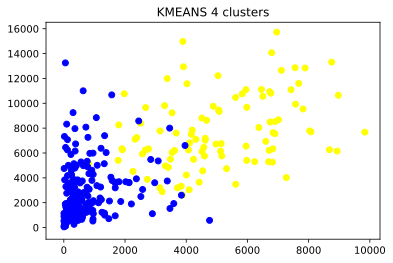

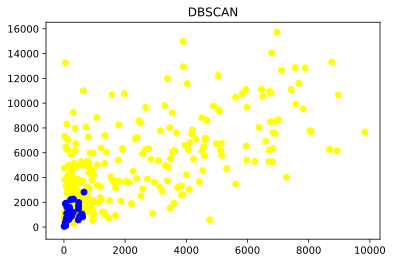

In [39]:
X1=cust_bonus[cust_bonus.labels==0].detergents_paper
X2=cust_bonus[cust_bonus.labels==1].detergents_paper

y1=cust_bonus[cust_bonus.labels==0].milk
y2=cust_bonus[cust_bonus.labels==1].milk

plt.figure()
plt.title("KMEANS 2 clusters")
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue');

X1=cust[cust.labels==0].detergents_paper
X2=cust[cust.labels==1].detergents_paper
X3=cust[cust.labels==2].detergents_paper
X4=cust[cust.labels==3].detergents_paper
y1=cust[cust.labels==0].milk
y2=cust[cust.labels==1].milk
y3=cust[cust.labels==2].milk
y4=cust[cust.labels==3].milk

plt.figure()
plt.title("KMEANS 4 clusters")
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue')
plt.scatter(X3,y3, color='cyan')
plt.scatter(X4,y4, color='purple');

X3=cust[cust.labels_DBSCAN==-1].detergents_paper
X4=cust[cust.labels_DBSCAN==0].detergents_paper

y3=cust[cust.labels_DBSCAN==-1].milk
y4=cust[cust.labels_DBSCAN==0].milk

plt.figure()
plt.title("DBSCAN")
plt.scatter(X3,y3, color='yellow')
plt.scatter(X4,y4, color='blue');

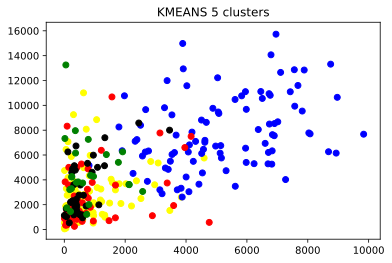

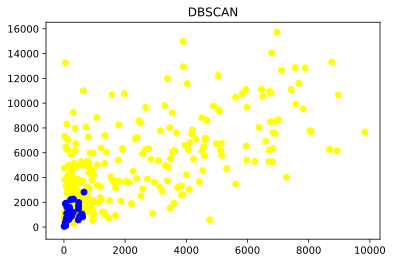

In [38]:
scaler=StandardScaler()
scaler.fit(cust_bonus)
cust_scale_bonus=pd.DataFrame(scaler.transform(cust_bonus),columns=cust_bonus.columns)
kme=KMeans(n_clusters=5)
clust=kme.fit(cust_scale_bonus)
cust_bonus['labels']=clust.labels_

X1=cust_bonus[cust_bonus.labels==0].detergents_paper
X2=cust_bonus[cust_bonus.labels==1].detergents_paper
X3=cust_bonus[cust_bonus.labels==2].detergents_paper
X4=cust_bonus[cust_bonus.labels==3].detergents_paper
X5=cust_bonus[cust_bonus.labels==4].detergents_paper

y1=cust_bonus[cust_bonus.labels==0].milk
y2=cust_bonus[cust_bonus.labels==1].milk
y3=cust_bonus[cust_bonus.labels==2].milk
y4=cust_bonus[cust_bonus.labels==3].milk
y5=cust_bonus[cust_bonus.labels==4].milk

plt.figure()
plt.title("KMEANS 5 clusters")
plt.scatter(X1,y1, color='yellow')
plt.scatter(X2,y2, color='blue')
plt.scatter(X3,y3, color='red')
plt.scatter(X4,y4, color='black')
plt.scatter(X5,y5, color='green');

d1=cust[cust.labels_DBSCAN==-1].detergents_paper
d2=cust[cust.labels_DBSCAN==0].detergents_paper

c1=cust[cust.labels_DBSCAN==-1].milk
c2=cust[cust.labels_DBSCAN==0].milk

plt.figure()
plt.title("DBSCAN")
plt.scatter(d1,c1, color='yellow')
plt.scatter(d2,c2, color='blue');

In [29]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [46]:
# Your code here
dbscan_new=DBSCAN(eps=0.1,min_samples=2)
clustersDB_new=dbscan_new.fit(cust_scale)
cust_bonus['labels_DBSCAN']=clustersDB.labels_
#cust_bonus=cust_bonus.drop('labels',axis=1)
cust_bonus.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels_DBSCAN
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,-1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,-1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,-1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,-1
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,-1


In [47]:
# Your comment here
cust_bonus.labels_DBSCAN.value_counts()

-1    320
 0     30
Name: labels_DBSCAN, dtype: int64

In [48]:
dbscan_new=DBSCAN(eps=2,min_samples=50)
clustersDB_new=dbscan_new.fit(cust_scale)
cust_bonus['labels_DBSCAN']=clustersDB.labels_
#cust_bonus=cust_bonus.drop('labels',axis=1)
cust_bonus.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels_DBSCAN
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,-1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,-1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,-1
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,-1
5,2,3,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,-1


In [49]:
cust_bonus.labels_DBSCAN.value_counts()

-1    320
 0     30
Name: labels_DBSCAN, dtype: int64

In [ ]:
#Aparentemente no cambian los clusters al aumentar epsilon ni aumentando el numero minimo de muestras, tampoco si
#estos disminuyen